# Final Project: Report on Data Analysis Technique

Hey everyone! For this assignment, you will be working in groups to analyze a dataset using various data analysis techniques. Here's what you need to do:

**Objective:**
1. Dataset Selection
Get together with your group and choose a dataset that interests all of you. It can be the same dataset as last time or a completely new one.

2. Data Analysis Techniques
Apply any one or more of the following data analysis techniques to your chosen dataset:
- Apriori Algorithm
- Clustering
    - K-means
    - EM Clustering
    - DBScan Clustering
    - SLINK Clustering
- Linear Regression

3. Data Preparation
Once you have your dataset, make sure it's ready for analysis. Clean the data, handle missing values, and prepare it for the chosen analysis technique.

4. Analysis and Insights
Use the selected technique to analyze the dataset. Dive deep into the insights and patterns that emerge from your analysis.

5. Presentation Preparation
Prepare a presentation to showcase your findings to the class. Create visualizations on both the descriptive statistics and the results of your analysis and provide clear explanations for the insights you've gathered. Take note of the suggestions and recommendations I've outlined regarding visualizing data from your midterm project.

6. Presentation Recording
Since we will be presenting online, pre-record your presentation to ensure it's within 10-12 minutes. Keep it concise and engaging for your audience.

7. Grading Criteria
Your assignment will be graded based on the following criteria:
 Analysis Technique (30%)

Alignment of the chosen analysis technique with the dataset and research question.
Depth and Quality of Insights (30%)

Clear interpretation of results with meaningful insights.
Exploration of patterns, trends, or anomalies in the data.
Data Visualization (15%)

Appropriate use of charts and graphs for the given data.

Creativity and Novelty (15%)

Presentation of unique or surprising findings.
Exploration of creative approaches to the problem or dataset.
Presentation Quality (10%)

Clarity and coherence of the presentation.
Use of effective visualizations to explain findings.
Engagement and conciseness in delivering the recorded presentation.
Remember to collaborate effectively with your group members and have fun exploring and analyzing your chosen dataset! If you have any questions, feel free to reach out to me. Final presentations will be on December 9, 2024 from 4 PM to 7PM. If any groups haven't finished by then, there will be one final presentation on December 11, 2024.

For your submission, include a link to your video (make sure it is publicly accessible) as well as a document detailing the individual contributions of each member.

Good luck!

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('employment_rates.csv', delimiter=';', skiprows=2, encoding='utf-8')
print(df.head())  # Inspect the data structure

print(df.columns)  # Check all column names
print(df.columns[2:])  # Inspect columns starting from index 2

print(df.iloc[0])

# Convert the columns correctly
# for column in df.columns[2:]:  
#     df[column] = pd.to_numeric(df[column].replace('..', '', regex=True), errors='coerce').astype(float)
    
for column in df.columns[2:]:  # Start from numeric columns
    df[column] = df[column].replace('..', np.nan).astype(float)

missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values
df.fillna(0, inplace=True)

summary = df.describe()
print(summary)

# Save cleaned data
df.to_csv('CleanedLaborForceData.csv', index=False)

month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12,
    'Q1': 1,   # Assuming quarterly data (e.g., Q1 = January, February, March)
    'Q2': 4,   # Quarter 2 (e.g., April, May, June)
    'Q3': 7,   # Quarter 3 (e.g., July, August, September)
    'Q4': 10   # Quarter 4 (e.g., October, November, December)
}

# We assume 'Monthly/Quarterly' contains month names for monthly data and that annual data may be missing months.
df['Month_Number'] = df['Monthly/Quarterly'].apply(lambda x: month_map.get(x, None) if x != 'Annual' else None)

# Remove rows where 'Month_Number' is None or NaN
df = df.dropna(subset=['Month_Number'])

# Ensure 'Month_Number' is an integer type
df['Month_Number'] = df['Month_Number'].astype(int)

# Create a new 'Date' column using the 'Year' and 'Month_Number'
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_Number'].astype(str), format='%Y-%m')

# Check the result
print(df.head())



   Year Monthly/Quarterly Labor Force Participation Rate Employment Rate  \
0  2024           January                          61.14           95.53   
1  2024          February                          64.80           96.46   
2  2024             March                          65.32           96.09   
3  2024             April                          64.10           95.95   
4  2024               May                          64.82           95.87   

  Unemployment Rate Underemployment Rate Visible Underemployment Rate  
0              4.47                13.92                         7.29  
1              3.54                12.41                         7.71  
2              3.91                10.97                         6.66  
3              4.05                14.55                         9.15  
4              4.13                 9.85                         6.05  
Index(['Year', 'Monthly/Quarterly', 'Labor Force Participation Rate',
       'Employment Rate', 'Unemployment R

In [33]:
# Descriptive Statistics
print(df.describe())


              Year  Labor Force Participation Rate  Employment Rate  \
count   260.000000                      260.000000       260.000000   
mean   2014.500000                       31.350000        46.058308   
std       5.777402                       31.922663        46.880283   
min    2005.000000                        0.000000         0.000000   
25%    2009.750000                        0.000000         0.000000   
50%    2014.500000                        0.000000         0.000000   
75%    2019.250000                       63.972500        93.432500   
max    2024.000000                       67.450000        96.930000   

       Unemployment Rate  Underemployment Rate  Visible Underemployment Rate  
count         260.000000            260.000000                    260.000000  
mean            3.172423              8.272308                      5.064462  
std             3.474607              8.730644                      5.341626  
min             0.000000              0.0000

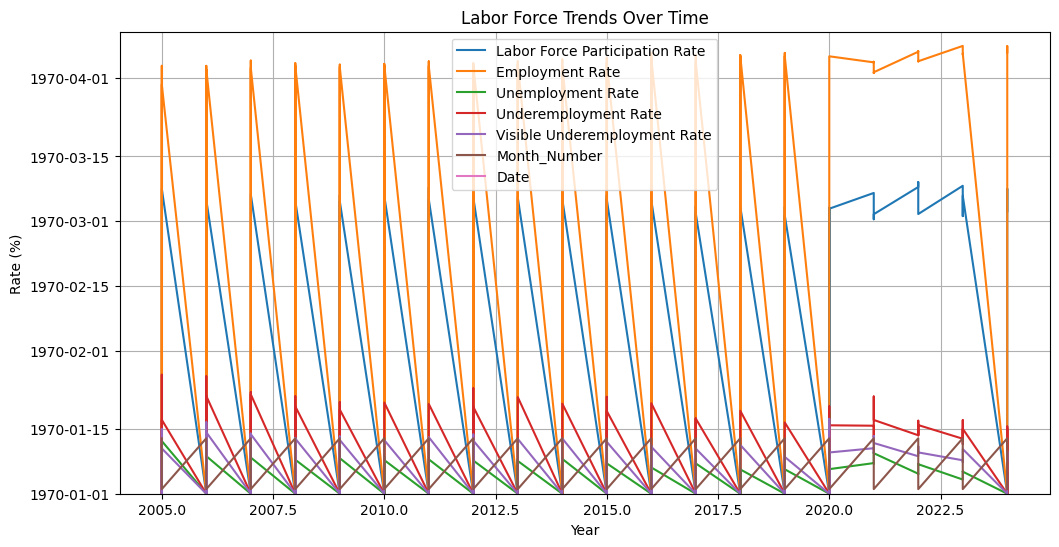

In [62]:
# # Babalikan!!!!
# # Trend Analysis
# # Visualize trends over time: Use line plots to observe how participation, employment, unemployment, and underemployment rates have changed.
# # Focus on month-over-month changes to detect seasonal patterns or trends

# import matplotlib.pyplot as plt

# # Convert 'Monthly/Quarterly' to datetime (optional for improved time-series analysis)
# # df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Monthly/Quarterly'], format='%Y-%B', errors='coerce')
# # Plot trends
# plt.figure(figsize=(12, 6))
# for column in df.columns[2:]:
#     plt.plot(df['Date'], df[column], label=column)
# plt.xlabel('Date')
# plt.ylabel('Rate')
# plt.title('Labor Force Trends Over Time')
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

for column in df.columns[2:]:
    plt.plot(df['Year'].astype(int), df[column], label=column)

# Set the X and Y axis labels
plt.xlabel('Year')
plt.ylabel('Rate (%)')

# Set the title for the graph
plt.title('Labor Force Trends Over Time')

# Display the legend to identify each line
plt.legend()

# Ensure Y-axis ranges from 0 to 100%
plt.ylim(0, 100)

# Show the plot
plt.grid(True)
plt.show()



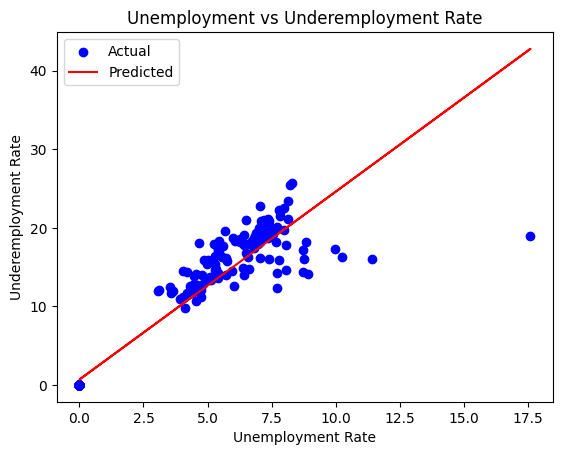

Slope: 2.3917285104205295, Intercept: 0.6847329721147508
R-squared: 0.9060299108203904


In [ ]:
# Linear Regression
# Note: 2021 - 2024 (Monthly)
# Note: 2005 - 2020 (Quarterly/Seasonal)
# Analyze the relationship between different rates. For example, how does the unemployment rate influence the underemployment rate?
# Fit a linear regression model to quantify these relationships.
from sklearn.linear_model import LinearRegression
import numpy as np

# Independent variable (X) and dependent variable (y)
X = df['Unemployment Rate'].values.reshape(-1, 1)
y = df['Underemployment Rate'].values.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Unemployment Rate')
plt.ylabel('Underemployment Rate')
plt.title('Unemployment vs Underemployment Rate')
plt.legend()
plt.show()

# Model parameters
print(f"Slope: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")
print(f"R-squared: {model.score(X, y)}")


                                Labor Force Participation Rate  \
Labor Force Participation Rate                        1.000000   
Employment Rate                                       0.999194   
Unemployment Rate                                     0.923392   
Underemployment Rate                                  0.962612   
Visible Underemployment Rate                          0.963450   

                                Employment Rate  Unemployment Rate  \
Labor Force Participation Rate         0.999194           0.923392   
Employment Rate                        1.000000           0.918472   
Unemployment Rate                      0.918472           1.000000   
Underemployment Rate                   0.959516           0.951856   
Visible Underemployment Rate           0.958745           0.971203   

                                Underemployment Rate  \
Labor Force Participation Rate              0.962612   
Employment Rate                             0.959516   
Unemployment R

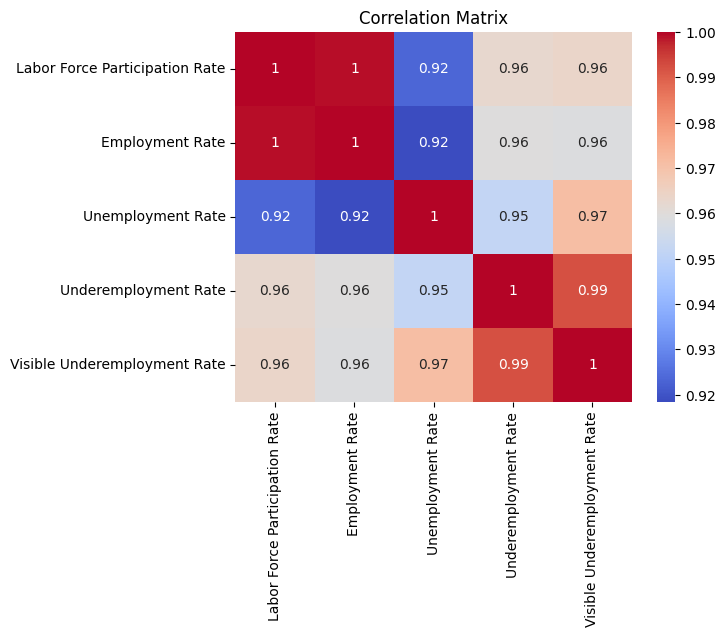

In [44]:
# Correlation Analysis
# Select only numeric columns for correlation calculation (excluding 'Year')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Remove 'Year' column if it's included in the numeric columns
numeric_columns = [col for col in numeric_columns if col != 'Year']

# Calculate correlation coefficients between numeric columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Visualize with a heatmap (optional)
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


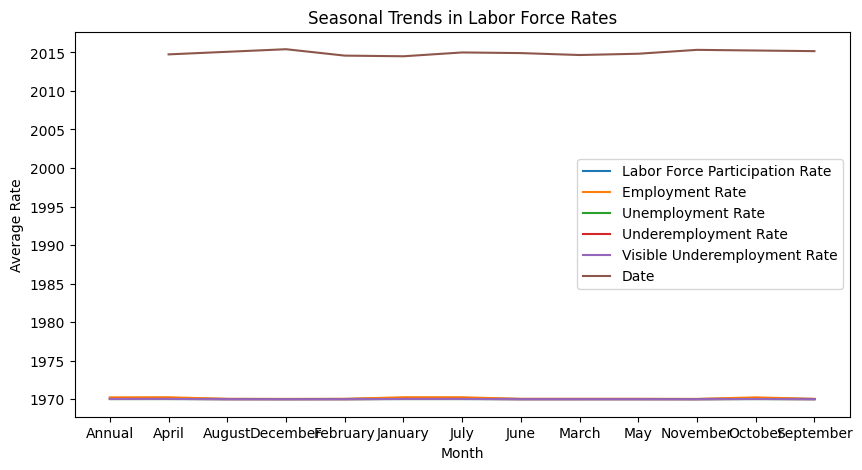

In [48]:
# Seasonal Analysis (Optional)
# If the dataset spans multiple years, analyze seasonal effects (e.g., differences in labor rates by quarter or month).

# Group by 'Monthly/Quarterly' for average trends
monthly_avg = df.groupby('Monthly/Quarterly').mean()

plt.figure(figsize=(10, 5))
for column in df.columns[2:]:
    plt.plot(monthly_avg.index, monthly_avg[column], label=column)
plt.xlabel('Month')
plt.ylabel('Average Rate')
plt.title('Seasonal Trends in Labor Force Rates')
plt.legend()
plt.show()


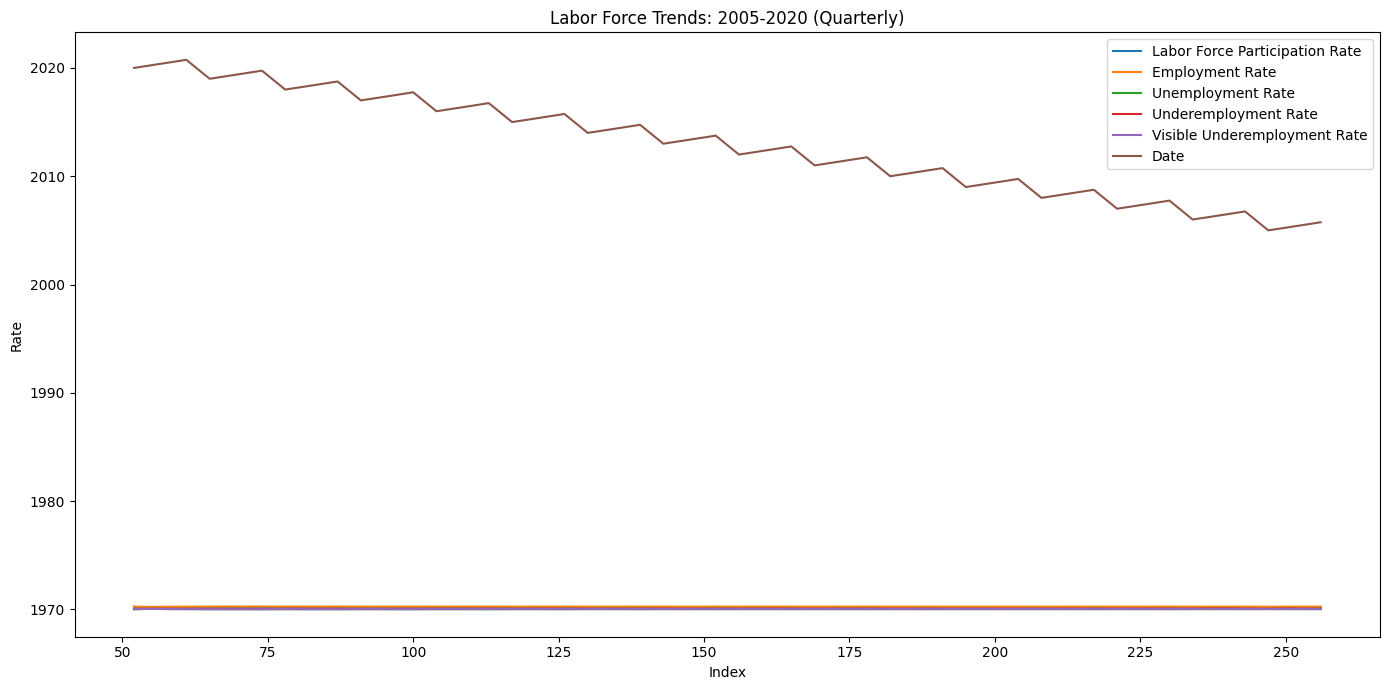

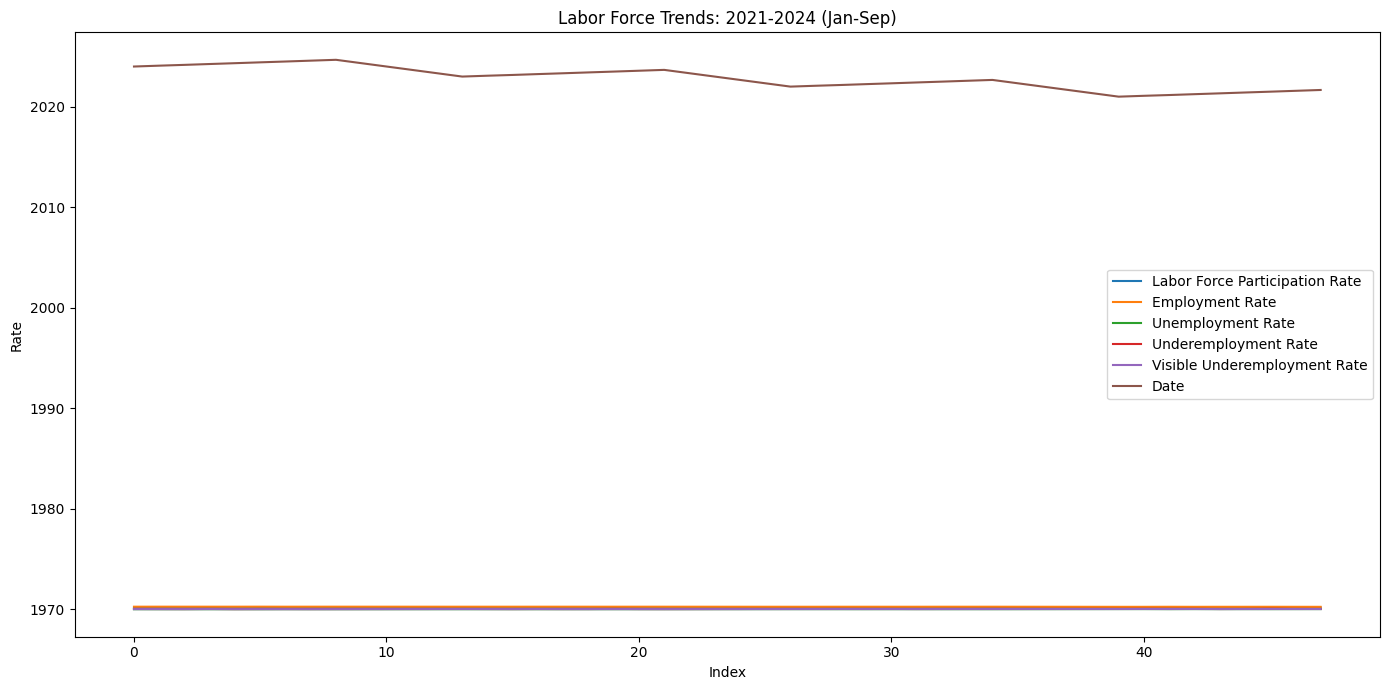

In [51]:
import matplotlib.pyplot as plt

# Ensure that 'Date' column is already converted to datetime
# First, filter for 2005 to 2020 with quarterly data (January, April, July, October)
# df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['Monthly/Quarterly'], errors='coerce', format='%Y %B')

# Filter for 2005 to 2020 and select the months January, April, July, October
df_2005_2020 = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2020)]
df_2005_2020_quarterly = df_2005_2020[df_2005_2020['Date'].dt.month.isin([1, 4, 7, 10])]

# Filter for 2021 to 2024, from January 2021 to September 2024
df_2021_2024 = df[(df['Date'].dt.year >= 2021) & (df['Date'].dt.year <= 2024)]
df_2021_2024 = df_2021_2024[(df_2021_2024['Date'].dt.month >= 1) & (df_2021_2024['Date'].dt.month <= 9)]

# Plot the data for 2005-2020 (quarterly)
plt.figure(figsize=(14, 7))
for column in df_2005_2020_quarterly.columns[2:]:  # Skip non-numeric columns
    plt.plot(df_2005_2020_quarterly.index, df_2005_2020_quarterly[column], label=column)
plt.xlabel('Index')
plt.ylabel('Rate')
plt.title('Labor Force Trends: 2005-2020 (Quarterly)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the data for 2021-2024 (Jan-Sep)
plt.figure(figsize=(14, 7))
for column in df_2021_2024.columns[2:]:  # Skip non-numeric columns
    plt.plot(df_2021_2024.index, df_2021_2024[column], label=column)
plt.xlabel('Index')
plt.ylabel('Rate')
plt.title('Labor Force Trends: 2021-2024 (Jan-Sep)')
plt.legend()
plt.tight_layout()
plt.show()
